# Sales Analysis

Import Libraries

In [48]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None  # default='warn'

#### Task 1: Merging 12 months of sales data into a single file

In [49]:
file_path = '/Users/christinamanara/Library/Mobile Documents/com~apple~CloudDocs/Data Science & Machine Learning/Personal Projects/Sales_Analysis-1/Sales_Data'
file_list = os.listdir(file_path)
file_list

['Sales_December_2019.csv',
 'Sales_April_2019.csv',
 'Sales_February_2019.csv',
 'Sales_March_2019.csv',
 'Sales_August_2019.csv',
 'Sales_May_2019.csv',
 'Sales_November_2019.csv',
 'Sales_October_2019.csv',
 'Sales_January_2019.csv',
 'Sales_September_2019.csv',
 'Sales_July_2019.csv',
 'Sales_June_2019.csv']

In [50]:
df_append = pd.DataFrame()

#append all files into a csv
for file in file_list:
    # df_tmp = pd.read_csv(file_path+'/'+file)
    # df_append = df_append.append(df_tmp, ignore_index=True)
    df = pd.read_csv(file_path+'/'+file, header=0)
    df_append = pd.concat((df, df_append), axis=0)

df_append.to_csv('all.csv')

In [51]:
count_row = df_append.shape[0]  # Gives number of rows
count_col = df_append.shape[1]  # Gives number of columns
print("Shape of the dataframe before cleaning:", count_row, count_col)

Shape of the dataframe before cleaning: 186850 6


#### Cleaning the dataframe!

In [52]:
df_append_nan = df_append[df_append.isna().any(axis=1)]
df_append_nan

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
339,NaN,NaN,NaN,NaN,NaN,NaN
630,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1136,NaN,NaN,NaN,NaN,NaN,NaN
1349,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
22945,NaN,NaN,NaN,NaN,NaN,NaN
22962,NaN,NaN,NaN,NaN,NaN,NaN
23309,NaN,NaN,NaN,NaN,NaN,NaN
23996,NaN,NaN,NaN,NaN,NaN,NaN


In [53]:
# Reset index after drop
df_append = df_append.dropna(how='all')
df_append

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101"
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016"
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001"
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101"
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016"
...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016"
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001"
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101"
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001"


In [54]:
count_row = df_append.shape[0]  # Gives number of rows
count_col = df_append.shape[1]  # Gives number of columns
print("Shape of the dataframe before cleaning:", count_row, count_col)

Shape of the dataframe before cleaning: 186305 6


Creation of new column - City (will be useful for task 2)

In [55]:
def extract_city(tmp):
    if len(tmp) > 20:
        result = tmp.split(',')[1] + '(' + tmp.split(',')[2].split(' ')[1] + ')'
        return result

df_append['City'] = df_append['Purchase Address'].apply(extract_city)


In [56]:
df_append

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",Portland(ME)
1,209922,Macbook Pro Laptop,1,1700.0,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",San Francisco(CA)
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",Los Angeles(CA)
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",Seattle(WA)
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",San Francisco(CA)
...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",San Francisco(CA)
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Los Angeles(CA)
25114,319668,Vareebadd Phone,1,400,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Seattle(WA)
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dallas(TX)


#### Task 2: What was the best month for sale? How much was earned that month?

In [57]:
df_append['Date'] = pd.to_datetime(df_append['Order Date'], errors='coerce')
df_append['Date'] = df_append['Date'].dt.month
df_append['Date'] = df_append['Date'].astype('Int64')

df_append['Quantity Ordered'] = pd.to_numeric(df_append['Quantity Ordered'], errors='coerce')
df_append['Price Each'] = pd.to_numeric(df_append['Price Each'], errors='coerce')
df_append['Date'] = df_append['Date'].astype('Int64')
df_append['Quantity Ordered'] = df_append['Quantity Ordered'].astype('Int64')
df_append['Total Price'] = df_append['Quantity Ordered'] * df_append['Price Each']

df1 = df_append[['Date', 'Quantity Ordered', 'Price Each', 'Total Price']]

In [58]:
df1

,Date,Quantity Ordered,Price Each,Total Price
0,6,1,11.95,11.95
1,6,1,1700.00,1700.0
2,6,1,999.99,999.99
3,6,1,149.99,149.99
4,6,1,99.99,99.99
...,...,...,...,...
25112,12,1,14.95,14.95
25113,12,2,3.84,7.68
25114,12,1,400.00,400.0
25115,12,1,11.99,11.99


In [59]:
df1.head(20)

,Date,Quantity Ordered,Price Each,Total Price
0,6,1,11.95,11.95
1,6,1,1700.00,1700.0
2,6,1,999.99,999.99
3,6,1,149.99,149.99
4,6,1,99.99,99.99
5,6,1,150.00,150.0
6,6,1,14.95,14.95
7,6,1,150.00,150.0
8,6,1,11.99,11.99
9,6,1,149.99,149.99


In [60]:
# How many items ordered in December
df1.groupby('Date')['Quantity Ordered'].count().reset_index().max()

Date                   12
Quantity Ordered    24984
dtype: int64

In [61]:
df2 = df1.groupby('Date')['Total Price'].sum().reset_index().max()
df2.astype(int)

Date                12
Total Price    4613443
dtype: int64

In [62]:
df3 = df1.groupby('Date')['Total Price'].sum().reset_index()
df3

,Date,Total Price
0,1,1822256.73
1,2,2202022.42
2,3,2807100.38
3,4,3390670.24
4,5,3152606.75
5,6,2577802.26
6,7,2647775.76
7,8,2244467.88
8,9,2097560.13
9,10,3736726.88


Visualisation of results

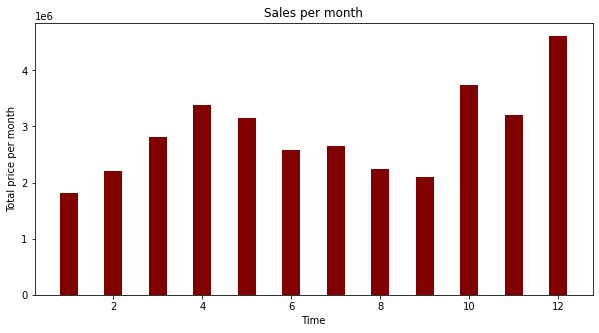

In [63]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(df3['Date'], df3['Total Price'], color ='maroon',
        width = 0.4)
 
plt.xlabel("Time")
plt.ylabel("Total price per month")
plt.title("Sales per month")
plt.show()

#### Task 3: What city had the highest number of sales?

In [64]:
df2 = df_append[['City', 'Total Price']]
df2

,City,Total Price
0,Portland(ME),11.95
1,San Francisco(CA),1700.0
2,Los Angeles(CA),999.99
3,Seattle(WA),149.99
4,San Francisco(CA),99.99
...,...,...
25112,San Francisco(CA),14.95
25113,Los Angeles(CA),7.68
25114,Seattle(WA),400.0
25115,Dallas(TX),11.99


In [65]:
df4 = df2.groupby('City')['Total Price'].sum().reset_index()

In [66]:
df4

,City,Total Price
0,Atlanta(GA),2795498.58
1,Austin(TX),1819581.75
2,Boston(MA),3661642.01
3,Dallas(TX),2767975.4
4,Los Angeles(CA),5452570.8
5,New York City(NY),4664317.43
6,Portland(ME),449758.27
7,Portland(OR),1870732.34
8,San Francisco(CA),8262203.91
9,Seattle(WA),2747755.48


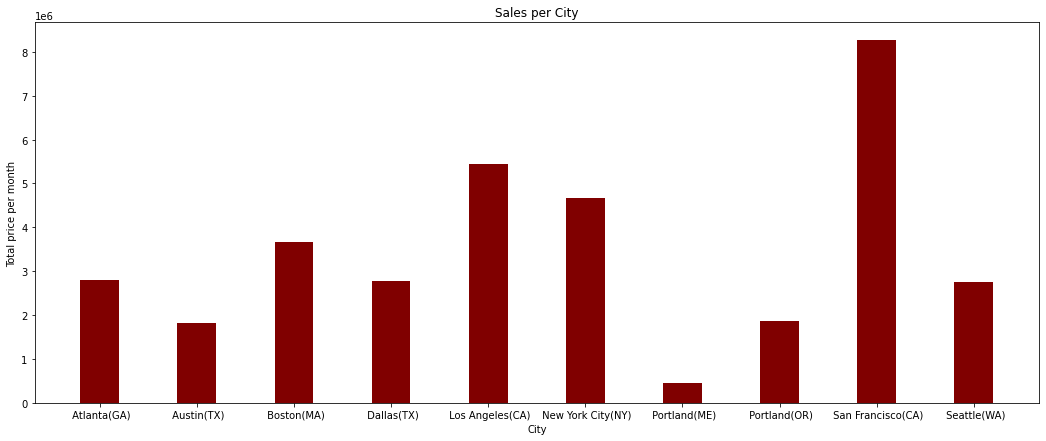

In [67]:
fig = plt.figure(figsize = (18, 7))

date = range(1, 13)
# creating the bar plot
plt.bar(df4['City'], df4['Total Price'], color ='maroon',
        width = 0.4)
 
plt.xlabel("City")
plt.ylabel("Total price per month")
plt.title("Sales per City")
plt.show()

#### Task 3: What time should we display advertisements to maximize likelihood of costumer's buying product? 

In [68]:
df_append

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Date,Total Price
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",Portland(ME),6,11.95
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",San Francisco(CA),6,1700.0
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",Los Angeles(CA),6,999.99
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",Seattle(WA),6,149.99
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",San Francisco(CA),6,99.99
...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",San Francisco(CA),12,14.95
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Los Angeles(CA),12,7.68
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Seattle(WA),12,400.0
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dallas(TX),12,11.99


In [69]:
df_append['Time'] = pd.to_datetime(df_append['Order Date'], errors='coerce')
df_append['Time'] = df_append['Time'].dt.hour
df_append['Time'] = df_append['Time'].astype('Int64')

In [70]:
df_append

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Date,Total Price,Time
0,209921,USB-C Charging Cable,1,11.95,06/23/19 19:34,"950 Walnut St, Portland, ME 04101",Portland(ME),6,11.95,19
1,209922,Macbook Pro Laptop,1,1700.00,06/30/19 10:05,"80 4th St, San Francisco, CA 94016",San Francisco(CA),6,1700.0,10
2,209923,ThinkPad Laptop,1,999.99,06/24/19 20:18,"402 Jackson St, Los Angeles, CA 90001",Los Angeles(CA),6,999.99,20
3,209924,27in FHD Monitor,1,149.99,06/05/19 10:21,"560 10th St, Seattle, WA 98101",Seattle(WA),6,149.99,10
4,209925,Bose SoundSport Headphones,1,99.99,06/25/19 18:58,"545 2nd St, San Francisco, CA 94016",San Francisco(CA),6,99.99,18
...,...,...,...,...,...,...,...,...,...,...
25112,319666,Lightning Charging Cable,1,14.95,12/11/19 20:58,"14 Madison St, San Francisco, CA 94016",San Francisco(CA),12,14.95,20
25113,319667,AA Batteries (4-pack),2,3.84,12/01/19 12:01,"549 Willow St, Los Angeles, CA 90001",Los Angeles(CA),12,7.68,12
25114,319668,Vareebadd Phone,1,400.00,12/09/19 06:43,"273 Wilson St, Seattle, WA 98101",Seattle(WA),12,400.0,6
25115,319669,Wired Headphones,1,11.99,12/03/19 10:39,"778 River St, Dallas, TX 75001",Dallas(TX),12,11.99,10


In [71]:
df5 = df_append.groupby('Time')['Quantity Ordered'].count().reset_index()
df5

,Time,Quantity Ordered
0,0,3910
1,1,2350
2,2,1243
3,3,831
4,4,854
5,5,1321
6,6,2482
7,7,4011
8,8,6256
9,9,8748


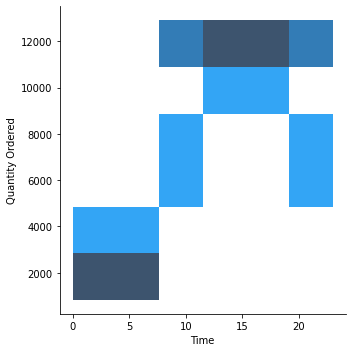

In [72]:
sns.displot(df5 , x=df5['Time'], y=df5['Quantity Ordered'])

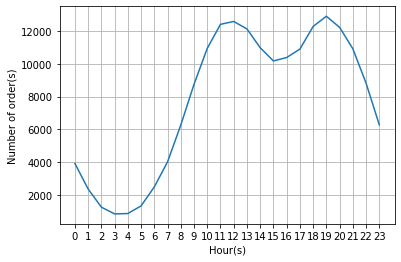

In [73]:
plt.plot(df5['Time'], df5['Quantity Ordered'])
plt.xticks(df5['Time'])
plt.xlabel("Hour(s)")
plt.ylabel("Number of order(s)")
plt.grid()
plt.show()

## Recommendation is around 11am or 7pm. 

#### Task 4: What products are most often sold together? 

In [75]:
df = df_append[df_append['Order ID'].duplicated(keep=False)]

In [76]:
df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,City,Date,Total Price,Time
17,209938,iPhone,1,700.00,06/15/19 12:29,"766 Meadow St, Seattle, WA 98101",Seattle(WA),6,700.0,12
18,209938,Wired Headphones,1,11.99,06/15/19 12:29,"766 Meadow St, Seattle, WA 98101",Seattle(WA),6,11.99,12
29,209949,Google Phone,1,600.00,06/23/19 07:45,"637 12th St, San Francisco, CA 94016",San Francisco(CA),6,600.0,7
30,209949,USB-C Charging Cable,1,11.95,06/23/19 07:45,"637 12th St, San Francisco, CA 94016",San Francisco(CA),6,11.95,7
41,209960,USB-C Charging Cable,1,11.95,06/22/19 11:53,"333 Sunset St, Dallas, TX 75001",Dallas(TX),6,11.95,11
...,...,...,...,...,...,...,...,...,...,...
25028,319584,Wired Headphones,1,11.99,12/11/19 00:30,"537 Sunset St, Portland, OR 97035",Portland(OR),12,11.99,0
25040,319596,iPhone,1,700.00,12/01/19 08:44,"436 14th St, New York City, NY 10001",New York City(NY),12,700.0,8
25041,319596,Lightning Charging Cable,1,14.95,12/01/19 08:44,"436 14th St, New York City, NY 10001",New York City(NY),12,14.95,8
25076,319631,34in Ultrawide Monitor,1,379.99,12/17/19 22:35,"363 Highland St, Austin, TX 73301",Austin(TX),12,379.99,22


In [77]:
df['Concatenated'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df = df[['Order ID', 'Concatenated']].drop_duplicates()

In [78]:
df

,Order ID,Concatenated
17,209938,"iPhone,Wired Headphones"
29,209949,"Google Phone,USB-C Charging Cable"
41,209960,"USB-C Charging Cable,AA Batteries (4-pack)"
43,209961,"iPhone,Lightning Charging Cable"
147,210064,"Lightning Charging Cable,27in FHD Monitor"
...,...,...
24977,319536,"Macbook Pro Laptop,Wired Headphones"
24998,319556,"Google Phone,Wired Headphones"
25027,319584,"iPhone,Wired Headphones"
25040,319596,"iPhone,Lightning Charging Cable"


In [79]:
from itertools import combinations
from collections import Counter

counter = Counter()

for row in df['Concatenated']:
    row_list = row.split(',')
    counter.update(Counter(combinations(row_list, 2)))

for key, value in counter.most_common(10):
    print(key, value)

('Product', 'Product') 62835
('iPhone', 'Lightning Charging Cable') 1005
('Google Phone', 'USB-C Charging Cable') 987
('iPhone', 'Wired Headphones') 447
('Google Phone', 'Wired Headphones') 414
('Vareebadd Phone', 'USB-C Charging Cable') 361
('iPhone', 'Apple Airpods Headphones') 360
('Google Phone', 'Bose SoundSport Headphones') 220
('USB-C Charging Cable', 'Wired Headphones') 160
('Vareebadd Phone', 'Wired Headphones') 143


#### Task 5: What product sold the most? Why do you think it sold the most?